Source: Forward pass theory
http://neuralnetworksanddeeplearning.com/chap1.html

Source: Backpropagation theory, complete demonstration
http://neuralnetworksanddeeplearning.com/chap2.html

# Algorithmic formulation for the backpropagation pass 
The most important algorithm in ML and Deep Learning is the backpropagation algorithm. There are many formulations of this backpropagation algorithm for Deep Learning. In this case I will use the formulation described by *Michael Nielsen*. As introduction to the calculations performed by PyTorch in the background I will use `Manual Models` that are based on the authors python model for Deep Learning.

In [2]:
from IPython.display import Image
import sympy as sp

### Representation of the weights 
The image below shows the weight on a connection from the fourth neuron in the second layer to the second neuron in the third layer of the network.

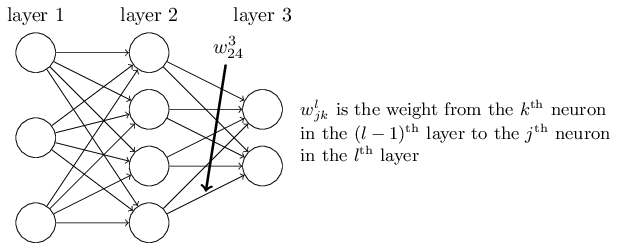

In [3]:
Image("images/nn-net-1.png")

### Representation of biases and activations
The expression $b_l^j$ is used for the bias of the $j^{\rm th}$ neuron in the $l^{\rm th}$ layer. And $a^l_j$ represents the activation of the $j^{\rm th}$ neuron in the $l^{\rm th}$ layer.

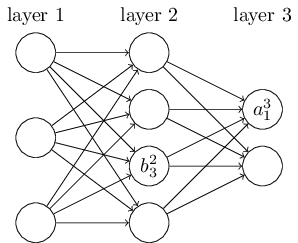

In [5]:
Image("images/nn-net-2.png")

## Computing the output (Activation) from a neural network
The activation $a_{j}^{l}$ of the $j^{th}$ neuron in the $l^{th}$ layer is related to the activations in the $(l-1)^{th}$ layer by the equation 
$$
\begin{eqnarray} 
  a^{l}_j = \sigma\left( \sum_k w^{l}_{jk} a^{l-1}_k + b^l_j \right), \tag{1}
\end{eqnarray}
$$

$w^l_{jk}$: the weight for the connection from the $k^{\rm th}$ neuron in the $(l-1)^{th}$ layer to the $j^{th}$ neuron in the $l^{th}$ layer

$a^{l-1}_{j}$: the activation of the $j^{th}$ neuron in the $(l-1)^{th}$ layer

$b^l_j$: the bias of the $j^{\rm th}$ neuron in the $l^{\rm th}$ layer

$\sigma(z) \equiv \frac{1}{1+e^{-z}}$, sigmoid activation function

In compact vector form the Eq.1:
$$
\begin{eqnarray} 
  a^{l} = \sigma(w^l a^{l-1}+b^l),
\tag{2}\end{eqnarray}
$$

$w^l$: a matrix of weights connecting to the $l^{\rm th}$ layer of neurons: $j = rows$, $k = columns$ in $w^l_{jk}$

Defining as Weighted Input the expression $z_{j}^{l}$:
$$
z^l_j
= \sum_k w^l_{jk} a^{l-1}_k+b^l_j
$$

And in vector form:
$$
z^l \equiv w^l a^{l-1}+b^l
$$

The Eq. 2 in terms of the weighted input: 
$$a^l =
\sigma(z^l)
$$

## Backpropagation starting with the General Quadratic Cost Function

$$
\begin{eqnarray}  C(w,b) =
  \frac{1}{2n} \sum_x \| y(x) - a^{L}\|^2.
\tag{3}\end{eqnarray}
$$

$y = y(x)$: desired output

$x$: training inputs, (sum over the training inputs)

$a^{L}$: vector of activation output (in the output layer L)

$n$: total number of training inputs

The cost function in terms of an average:
$$
C = \frac{1}{n} \sum_x C_x
$$

then $C_x =
\frac{1}{2} \|y-a^L \|^2$

The goal of backpropagation is to compute the partial derivatives of the Cost Function with respect to all the weights and biases of the neural network: $\partial C / \partial w$ and $\partial C / \partial b$. 

Until now we have: $\partial C_x / \partial w$ and $\partial C_x / \partial b$. For notation purposes we will use: $\partial C_x / \partial w = \partial C / \partial w$ , $\partial C_x / \partial b = \partial C / \partial b$ and $C =
\frac{1}{2} \|y-a^L \|^2$

For backpropagation purposes the cost function MUST be written as a function of the outputs ($a^L$) from the neural network


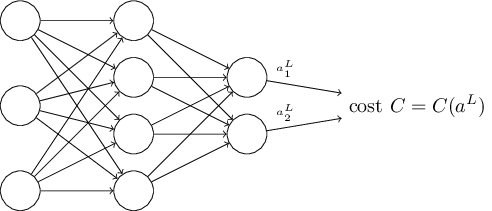

In [5]:
Image("images/cost_function_outputs.png")

In this case, the quadratic cost function CAN be expressed as function of the outputs of the NN in a single training example (x) as follows:
$$
\begin{eqnarray}
  C = \frac{1}{2} \|y-a^L\|^2 = \frac{1}{2} \sum_j (y_j-a^L_j)^2,
\tag{4}\end{eqnarray}
$$

Defining an "error like" helping term $\delta^l_j$ as the partial derivative of the cost with respect of Weighed input $z^l_j$:

$$
\begin{eqnarray} 
  \delta^l_j \equiv \frac{\partial C}{\partial z^l_j}.
\tag{5}\end{eqnarray}
$$

and a vector of errors of the $l$ layer following the Eq. 5 is: $\delta^l = \frac{\partial C}{\partial z^l}$

### An equation for the error in the output layer, $\delta^L$

The components of $\delta^L$ vector are given by:

$$
\begin{eqnarray} 
  \delta^L_j = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j),
\tag{BP1}\end{eqnarray}
$$

Demonstration

Following the Eq. 5 the error in the Last layer L must be:
 $$\delta^L_j = \frac{\partial C}{\partial z^L_j}$$
 
Applying the chain rule in function of the activation functions of the last layer L

$$\delta^L_j = \frac{\partial C}{\partial a^L_j} \frac{\partial a^L_j}{\partial z^L_j}$$

In this case the activation function ($a_j^L$) is the sigmoid activation function $\sigma (z_j^L)$ then

$$
\delta^L_j = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j)
$$

*Derivative of the Sigmoid Function*

In [3]:
# Define the variable
z = sp.symbols('z')

# Define the sigmoid function
sigmoid = 1 / (1 + sp.exp(-z))

# Compute the derivative of the sigmoid function with respect to z
sigmoid_derivative = sp.diff(sigmoid, z)

# Display the result
sigmoid_derivative

exp(-z)/(1 + exp(-z))**2

In generalized vector form: 
$$\sigma'(z^L) = \frac{e^{- z^L}}{\left(1 + e^{- z^L}\right)^{2}}$$
$$ = \frac{1}{(1 + e^{- z^L})}-\frac{1}{(1 + e^{- z^L})^2}$$
$$ = \frac{1}{(1 + e^{- z^L})} \left ( 1 -  \frac{1}{(1 + e^{- z^L})} \right )$$
$$\sigma'(z^L) = \sigma(z^L)\left ( 1-\sigma(z^L) \right )$$

Derivative of the quadratic cost function
 $$C = \frac{1}{2} \sum_j (y_j-a^L_j)^2$$ 
 $$\frac{\partial C}{\partial a^L_j} = \frac{\partial}{\partial a^L_j}\frac{1}{2} \sum_j (y_j-a^L_j)^2$$
 $$ = \frac{1}{2} \sum_j \frac{\partial}{\partial a^L_j} (y_j-a^L_j)^2$$
 $$ = \frac{1}{2} \sum_j  -2(y_j-a^L_j)$$
  $$ = \frac{-2}{2} \sum_j (y_j-a^L_j)$$
  $$ = - \sum_j (y_j-a^L_j)$$
  $$ \frac{\partial C}{\partial a^L_j} = \sum_j (a^L_j-y_j)$$
  In vector form: $\frac{\partial C}{\partial a^L_j}$ = $\nabla_a C = (a^L-y)$
  
In terms of an element by element operations, in this case multiplications, (elementwise operations), also called as Hadamard Product ($\odot$) in matrix form (suitable for numpy) $\delta^L$:

$$\begin{eqnarray} 
  \delta^L = \nabla_a C \odot \sigma'(z^L),
\tag{BP1a}\end{eqnarray}$$

With sigmoid function and quadratic cost function in matrix form:

$$ \delta^L = (a^L-y) \odot \sigma(z^L)\left ( 1-\sigma(z^L) \right )$$

### An equation for the error $\delta^l$ in terms of the error in the next layer, $\delta^{l+1}$

$$\begin{eqnarray} 
  \delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^{l}),
\tag{BP2}\end{eqnarray}$$

where $(w^{l+1})^T$ is the transpose of the weight matrix $w^{l+1}$

Eq. BP2 is useful if we only know the next error $\delta^{l+1}$, then we can calculate the "backward" $\delta^{l}$ error. In example, to calculate $\delta^{L-1}$ we can use Eq. BP1a to first calculate $\delta^{L}$ then using Eq. BP2 we can calculate $\delta^{L-1}$

$$\delta^{L-1} = ((w^{L})^T \delta^{L}) \odot \sigma'(z^{L-1})$$

$$\delta^{L-1} = ((w^{L})^T \nabla_a C \odot \sigma'(z^L)) \odot \sigma'(z^{L-1})$$

with a backpropagation algorithm we can calculate the error for all L-2, L-4, L-5, ..., L-N layers

Demonstration

The error $\delta^l$ in terms $\delta^{l+1}$ is that we want so, to rewrite $\delta^l_j = \partial C / \partial
z^l_j$ in terms of $\delta^{l+1}_k = \partial C / \partial z^{l+1}_k$, we need to use the chain rule, but using this we will lead with $k$ and $j$ terms so summing the $k$ terms will be necessary

$$
\begin{eqnarray}
  \delta^l_j & = & \frac{\partial C}{\partial z^l_j} \\
  & = & \sum_k \frac{\partial C}{\partial z^{l+1}_k} \frac{\partial z^{l+1}_k}{\partial z^l_j} \\ 
  & = & \sum_k \frac{\partial z^{l+1}_k}{\partial z^l_j} \delta^{l+1}_k,\tag{6}
\end{eqnarray}
$$

To calculate the derivative $\frac{\partial z^{l+1}_k}{\partial z^l_j}$ we rembember the definition of $z^{l+1}_k$ in terms of sigmoid activation function $\sigma$. Note that the sum now is over $j$ 

$$
  z^{l+1}_k = \sum_j w^{l+1}_{kj} a^l_j +b^{l+1}_k = \sum_j w^{l+1}_{kj} \sigma(z^l_j) +b^{l+1}_k.
$$

Differentiating:
$$
\begin{eqnarray}
  \frac{\partial z^{l+1}_k}{\partial z^l_j} = w^{l+1}_{kj} \sigma'(z^l_j).
\tag{7}
\end{eqnarray}
$$

Combining Eq. 6 and 7
$$\begin{eqnarray}
  \delta^l_j = \sum_k w^{l+1}_{kj}  \delta^{l+1}_k \sigma'(z^l_j).
\tag{8}\end{eqnarray}$$

Since $w^{l+1}_{kj} = (w^{l+1}_{jk})^T$ Eq. 8 in matrix form:

$$\delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^{l}),$$

## An equation for the rate of change of the cost with respect to any bias in the network
$$\begin{eqnarray}  \frac{\partial C}{\partial b^l_j} =
  \delta^l_j.
\tag{BP3}\end{eqnarray}$$

Demonstration 

Remember that $\delta^l_j = \frac{\partial C}{\partial z^l_j}$

Applying the chain rule for $\frac{\partial C}{\partial b^l_j}$ in terms of $\frac{\partial C}{\partial z^l_j}$

$$ 
\begin{eqnarray}
\frac{\partial C}{\partial b^l_j} = \frac{\partial C}{\partial z^l_j} \frac{\partial z^l_j}{\partial b^l_j}, 
\tag{9}\end{eqnarray}
$$

Evaluating the derivative $\frac{\partial z^l_j}{\partial b^l_j}$

$$ 
 \frac{\partial z^l_j}{\partial b^l_j} = \frac{\partial (\sum_k w^l_{jk} a^{l-1}_k+b^l_j)}{\partial b^l_j} \\
 = \sum_k \frac{\partial( w^l_{jk} a^{l-1}_k)}{\partial b^l_j} + \frac{\partial b^l_j}{\partial b^l_j} \\
 = 0 + 1
$$

Replacing in Eq. 9
$$
\begin{eqnarray}
\frac{\partial C}{\partial b^l_j} = \frac{\partial C}{\partial z^l_j} 1 = \frac{\partial C}{\partial z^l_j}
\end{eqnarray}
$$

## An equation for the rate of change of the cost with respect to any weight in the network

$$
\begin{eqnarray}
  \frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j,
\tag{BP4}\end{eqnarray}
$$

Demonstration

Remember that $\delta^l_j = \frac{\partial C}{\partial z^l_j}$

Applying the chain rule for $\frac{\partial C}{\partial w^l_{jk}}$ in terms of $\frac{\partial C}{\partial z^l_j}$

$$
\begin{eqnarray}
  \frac{\partial C}{\partial w^l_{jk}} = \frac{\partial C}{\partial z^l_j} \frac{\partial z^l_j}{\partial w^l_{jk}},
\tag {10}\end{eqnarray}
$$

Evaluating the derivative $\frac{\partial z^l_j}{\partial w^l_{jk}}$

$$ 
\begin{eqnarray}
 \frac{\partial z^l_j}{\partial w^l_{jk}} = \frac{\partial (\sum_k w^l_{jk} a^{l-1}_k+b^l_j)}{\partial w^l_{jk}} \\
 = \sum_k \frac{\partial( w^l_{jk} a^{l-1}_k)}{\partial w^l_{jk}} + \frac{\partial b^l_j}{\partial w^l_{jk}} \\
 = a^{l-1}_k + 0
\end{eqnarray}
$$

Replacing in Eq. 10
$$
\frac{\partial C}{\partial w^l_{jk}} = \frac{\partial C}{\partial z^l_j} a^{l-1}_k = a^{l-1}_k \delta^l_j
$$

Simplifying BP4 in terms of inputs and outputs of neurons

\begin{eqnarray}  \frac{\partial
    C}{\partial w} = a_{\rm in} \delta_{\rm out},
\tag{11}\end{eqnarray}

Where $a_{\rm in}$ is the activation of the neuron input to the weight $w$, and $\delta_{\rm out}$ is the error of the neuron output fom the weight $w$. Zommin in to look at just the weight $w$, and the two neurons connected by that weight, that can be drawn as this:


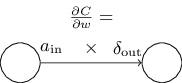

In [6]:
Image("images/zooming_w_two_neurons.png")

# Backpropagation algorithm

The backpropagation equations provide us with a way of computing the gradient of the cost function. Let's explicity write this out in the form of an algorithm

1. Input x: Set the corresponding activation a^1 for the input layer.
2. Feedforward, (forward pass): For each $l = 2, 3, ..., L$ compute $z^{l} = w^l a^{l-1}+b^l$ and $a^{l} = \sigma(z^{l})$
3. Output error $\delta^L$: Compute the vector $\delta^{L}
  = \nabla_a C \odot \sigma'(z^L)$
4. Backpropagate the error: For each $l = L-1, L-2,
  \ldots, 2$ compute $\delta^{l} = ((w^{l+1})^T \delta^{l+1}) \odot
  \sigma'(z^{l})$
5. Output: The gradient of the cost function is given by: $\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$ and $\frac{\partial C}{\partial b^l_j} = \delta^l_j$
